#### General imports

In [3]:
import pandas as pd
import numpy as np

#### import data from CSV

In [4]:
nodes = pd.read_csv('/content/drive/MyDrive/assgn-1/node-reference.csv')
# edges = pd.read_csv('/content/drive/MyDrive/assgn-1/map-edges-test.csv')
edges = pd.read_csv('/content/drive/MyDrive/assgn-1/map-edges.csv')

In [5]:
nodes

,node,description
0,1,E-block entrance
1,2,Left round about at rock gardens
2,3,Right round about at rock gardens
3,4,infinity pool vertex-LT
4,5,infinity pool vertex-RT
5,6,infinity pool vertex-LB
6,7,infinity pool vertex-RB
7,8,junction from infinity pool to SAC
8,9,junction from infinity pool to Lover’s Lane
9,10,junction from Road Not Taken to SAC


In [6]:
edges

,node,node.1,weight
0,1,2,0.1114
1,2,3,0.0982
2,1,33,0.0963
3,1,43,0.0794
4,3,33,0.2202
...,...,...,...
58,34,35,0.1471
59,34,44,0.1133
60,35,36,0.1047
61,36,37,0.0990


In [7]:
adjList = dict()
adjList

{}

#### function to add an edge to the adjacency list

In [8]:
def addAdjNode(node1, node2, weight):
  if node1 not in adjList.keys():
    adjList[node1] = {}
  if node2 not in adjList.keys():
    adjList[node2] = {}
  adjList[node1][node2] = weight
  adjList[node2][node1] = weight
  return

In [9]:
edges.apply(lambda row: addAdjNode(row['node'], row['node.1'], row['weight']), axis=1)

0     None
1     None
2     None
3     None
4     None
      ... 
58    None
59    None
60    None
61    None
62    None
Length: 63, dtype: object

In [10]:
adjList, type(adjList)

({1.0: {2.0: 0.1114, 33.0: 0.0963, 43.0: 0.0794},
  2.0: {1.0: 0.1114, 3.0: 0.0982, 36.0: 0.1359},
  3.0: {2.0: 0.0982, 33.0: 0.2202, 17.0: 0.1932, 37.0: 0.1364},
  33.0: {1.0: 0.0963, 3.0: 0.2202},
  43.0: {1.0: 0.0794, 11.0: 0.1413, 13.0: 0.0818},
  17.0: {3.0: 0.1932, 16.0: 0.1272},
  16.0: {17.0: 0.1272, 15.0: 0.3038, 29.0: 0.5486},
  37.0: {3.0: 0.1364, 38.0: 0.1002, 5.0: 0.1364, 36.0: 0.099},
  38.0: {37.0: 0.1002},
  5.0: {37.0: 0.1364, 4.0: 0.0984, 9.0: 0.0188, 40.0: 0.0968},
  36.0: {2.0: 0.1359, 4.0: 0.1378, 35.0: 0.1047, 37.0: 0.099},
  4.0: {8.0: 0.0195, 5.0: 0.0984, 36.0: 0.1378},
  8.0: {4.0: 0.0195, 6.0: 0.0197, 39.0: 0.1219},
  9.0: {5.0: 0.0188, 7.0: 0.0218, 29.0: 0.1901},
  40.0: {5.0: 0.0968},
  6.0: {8.0: 0.0197, 7.0: 0.0978, 18.0: 0.0588},
  7.0: {6.0: 0.0978, 9.0: 0.0218, 25.0: 0.0468},
  18.0: {6.0: 0.0588, 25.0: 0.0973, 19.0: 0.051},
  25.0: {7.0: 0.0468, 18.0: 0.0973, 24.0: 0.0618, 26.0: 0.1789},
  39.0: {8.0: 0.1219, 32.0: 0.0899},
  29.0: {9.0: 0.1901, 16.0: 

#### format the adjacency list to be compatible with igraph package

In [11]:
adjListGraph = dict((int(node), dict((int(node1), {'weight': weight}) for node1, weight in adjList_.items())) for node,adjList_ in adjList.items())
adjListGraph

{1: {2: {'weight': 0.1114}, 33: {'weight': 0.0963}, 43: {'weight': 0.0794}},
 2: {1: {'weight': 0.1114}, 3: {'weight': 0.0982}, 36: {'weight': 0.1359}},
 3: {2: {'weight': 0.0982},
  33: {'weight': 0.2202},
  17: {'weight': 0.1932},
  37: {'weight': 0.1364}},
 33: {1: {'weight': 0.0963}, 3: {'weight': 0.2202}},
 43: {1: {'weight': 0.0794}, 11: {'weight': 0.1413}, 13: {'weight': 0.0818}},
 17: {3: {'weight': 0.1932}, 16: {'weight': 0.1272}},
 16: {17: {'weight': 0.1272}, 15: {'weight': 0.3038}, 29: {'weight': 0.5486}},
 37: {3: {'weight': 0.1364},
  38: {'weight': 0.1002},
  5: {'weight': 0.1364},
  36: {'weight': 0.099}},
 38: {37: {'weight': 0.1002}},
 5: {37: {'weight': 0.1364},
  4: {'weight': 0.0984},
  9: {'weight': 0.0188},
  40: {'weight': 0.0968}},
 36: {2: {'weight': 0.1359},
  4: {'weight': 0.1378},
  35: {'weight': 0.1047},
  37: {'weight': 0.099}},
 4: {8: {'weight': 0.0195}, 5: {'weight': 0.0984}, 36: {'weight': 0.1378}},
 8: {4: {'weight': 0.0195}, 6: {'weight': 0.0197}, 

#### imports for drawing graph

In [12]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 38.1 MB/s 


In [13]:
import igraph as ig
import matplotlib.pyplot as plt

In [14]:
g = ig.Graph.DictDict(adjListGraph)
g.vs["label"] = g.vs.indices
g.es["curved"] = False
g.delete_vertices(0)
print(g)

IGRAPH U-W- 44 124 --
+ attr: label (v), curved (e), weight (e)
+ edges:
 0 --  1  1 32 32 42 42         18 -- 17 17 19 19 23 23 29 29   36 --  2  2  4
4 35 35 37 37
 1 --  0  0  2  2 35 35         19 -- 18 18 20 20 22 22 30 30   37 -- 36 36
 2 --  1  1 16 16 32 32 36 36   20 -- 19 19 21 21               38 --  7  7 31
31
 3 --  4  4  7  7 35 35         21 -- 20 20 22 22               39 --  4  4
 4 --  3  3  8  8 36 36 39 39   22 -- 19 19 21 21 23 23 27 27   40 -- 12 12 13
13 41 41
 5 --  6  6  7  7 17 17         23 -- 18 18 22 22 24 24 26 26   41 -- 14 14 40
40
 6 --  5  5  8  8 24 24         24 --  6  6 17 17 23 23 25 25   42 --  0  0 10
10 12 12
 7 --  3  3  5  5 38 38         25 -- 24 24 26 26 28 28         43 --  9  9 10
10 33 33
 8 --  4  4  6  6 28 28         26 -- 23 23 25 25 27 27
 9 -- 31 31 43 43               27 -- 22 22 26 26
10 -- 11 11 42 42 43 43         28 --  8  8 15 15 25 25
11 -- 10 10 12 12 13 13         29 -- 18 18 31 31
12 -- 11 11 40 40 42 42         30 -- 19 1

#### Fruchterman-Reingold force-directed algorithm graph

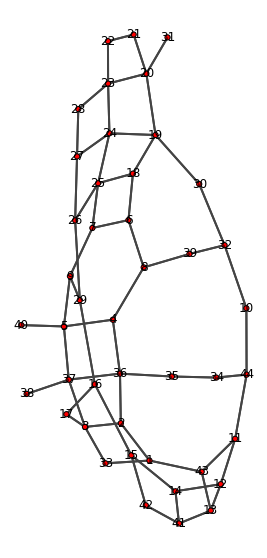

In [15]:
frlayout = g.layout("fr")
fig, ax = plt.subplots(figsize=(20, 10))
ig.plot(g, layout=frlayout, target=ax)

#### Kamada-Kawai force-directed algorithm graph

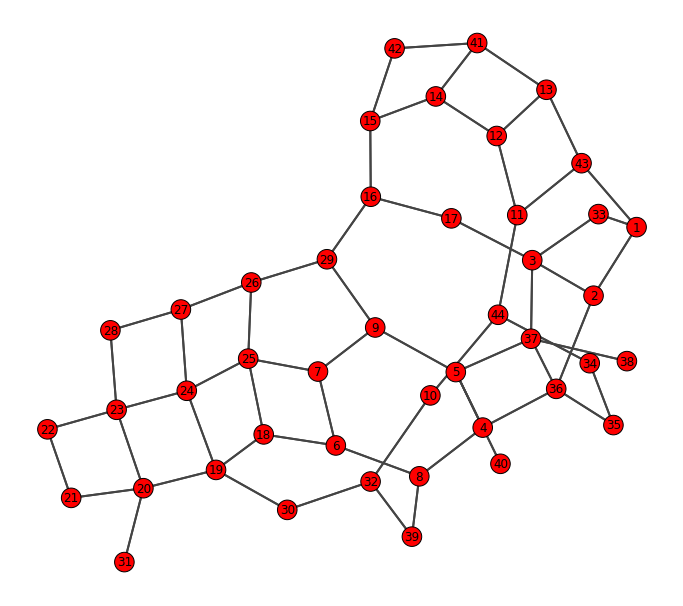

In [16]:
kklayout = g.layout("kk")
fig, ax = plt.subplots(figsize=(12, 12))
ig.plot(g, layout=kklayout, target=ax)

#### Dijkstra Algorithm

In [17]:
def dijkstra_shortest_path(start, finish):
  # define
  unsettled, settled, eval, state = set(), set(), int(), dict()
  # initialize
  eval = start
  unsettled.add(eval)
  for i in range(1, len(g.vs)+1):
    state[i] = [0, np.inf]
  state[eval][1] = 0
  # table to track progress
  table = pd.DataFrame(columns = ['unsettled', 'settled', 'eval', 'state'])
  table.index.name = 'iteration'
  table = table.append({'unsettled': unsettled, 'settled': settled, 'eval': eval, 'state': state}, ignore_index=True)
  # loop, the actual algorithm
  while len(unsettled) != 0:
    min_dist = np.inf
    for node in unsettled:
      if state[node][1] < min_dist:
        eval = node
        min_dist = state[node][1]
    temp_unsettled = adjListGraph[eval].keys() - settled
    for node in temp_unsettled:
      if state[node][1] > state[eval][1] + adjListGraph[eval][node]['weight']:
        state[node] = [eval, state[eval][1] + adjListGraph[eval][node]['weight']]
    unsettled = unsettled.union(temp_unsettled)
    unsettled.remove(eval)
    settled.add(eval)
    table = table.append({'unsettled': unsettled, 'settled': settled, 'eval': eval, 'state': state}, ignore_index=True)
  # get the path into a stack
  path, node, length = [], finish, state[finish][1]
  while node!=0:
    path.append(node)
    node = state[node][0]
  # print results
  print('\nfinal state:\n', state)
  print('\nthe path:\n')
  while(len(path) != 1):
    print(path.pop(), '->', end='')
  print(path.pop())
  return table

In [18]:
table = dijkstra_shortest_path(1, 37)


final state:
 {1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4: [36, 0.3851], 5: [37, 0.48239999999999994], 6: [8, 0.4243], 7: [6, 0.5221], 8: [4, 0.4046], 9: [5, 0.5012], 10: [44, 0.621], 11: [43, 0.2207], 12: [11, 0.29710000000000003], 13: [43, 0.1612], 14: [41, 0.5407], 15: [14, 0.718], 16: [17, 0.53], 17: [3, 0.40280000000000005], 18: [6, 0.48310000000000003], 19: [18, 0.5341], 20: [19, 0.5863], 21: [20, 0.6398], 22: [23, 0.7333000000000001], 23: [20, 0.6817000000000001], 24: [19, 0.6276], 25: [7, 0.5689], 26: [25, 0.7478], 27: [26, 0.784], 28: [27, 0.8421000000000001], 29: [9, 0.6913], 30: [19, 0.6727000000000001], 31: [20, 0.8277000000000001], 32: [39, 0.6164], 33: [1, 0.0963], 34: [35, 0.4991], 35: [36, 0.352], 36: [2, 0.2473], 37: [3, 0.346], 38: [37, 0.4462], 39: [8, 0.5265], 40: [5, 0.5791999999999999], 41: [13, 0.3883], 42: [41, 0.5781], 43: [1, 0.0794], 44: [11, 0.46740000000000004]}

the path:

1 ->2 ->3 ->37


In [19]:
table

,unsettled,settled,eval,state
0,{1},"{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
1,"{2, 43, 33}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
2,"{33, 2, 11, 13}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",43,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
3,"{2, 3, 11, 13}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",33,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
4,"{3, 36, 11, 13}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",2,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
5,"{3, 36, 41, 11, 12}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",13,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
6,"{17, 36, 37, 41, 11, 12}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",3,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
7,"{17, 36, 37, 41, 12, 44}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",11,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
8,"{35, 37, 4, 41, 12, 44, 17}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",36,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."
9,"{17, 35, 4, 37, 14, 41, 44}","{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",12,"{1: [0, 0], 2: [1, 0.1114], 3: [2, 0.2096], 4:..."


#### DFS algorithm

In [40]:
def get_DFS_weight(start, finish, visited):
  # print(start, finish, visited)
  if start == finish:
    return 0
  elif (start == None) or (start in visited):
    return None
  else:
    visited.add(start)
    for node in adjListGraph[start]:
      weight = get_DFS_weight(node, finish, visited)
      if weight is not None:
        # print(weight, adjListGraph[node][start])
        return weight + adjListGraph[node][start]['weight']

get_DFS_weight(1, 4, set())

2.4498

#### A* algorithm

Heuristic is taken as weight calculated using DFS(above). It(heuristic used) is not good. So sometimes the path is not correct.

In [66]:
def astar_shortest_path(start, finish):
  # initialize
  pending, visited, state, node, connections = set([start]), set(), {start: 0}, start, {start: start}
  # heuristic values
  h = {}
  for temp in range(1, len(g.vs)+1):
    h[temp] = get_DFS_weight(temp, finish, set())
  # the algorithm
  while len(pending) > 0:
    node = None
    for temp in pending:
      # print(temp, node)
      if (node == None) or (state[temp] + h[temp] < state[node] + h[node]):
        node = temp
    if node == None:
      # print('cannot find path')
      return
    if node == finish:
      path = []
      while connections[node] != node:
        path.append(node)
        node = connections[node]
      path.append(start)
      path.reverse()
      print('path: ', path)
      return path

    for temp, weight in adjListGraph[node].items():
      if temp not in pending and temp not in visited:
        pending.add(temp)
        connections[temp] = node
        state[temp] = state[node] + weight['weight']
      else:
        if state[temp] > state[node] + weight['weight']:
          state[temp] = state[node] + weight['weight']
          connections[temp] = node

          if temp in visited:
            visited.remove(temp)
            pending.add(temp)

    pending.remove(node)
    visited.add(node)

  # print('path does not exist')
  return

In [70]:
astar_shortest_path(1, 6)

path:  [1, 2, 36, 4, 8, 6]


[1, 2, 36, 4, 8, 6]